## Spatial FHN model

In [3]:
import numpy as np 
import scipy as sp
# import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt

# import sparse matrices
from scipy.sparse import csr_matrix

import os, sys
rootpath = os.path.join(os.getcwd(), '..')
sys.path.append(rootpath)



In [10]:
def FHN(t, y, return_nullclines=False):
    print(t,end='\r')
    u = y[:N]
    v = y[N:]
    du = a*u*(u-b)*(1-u) + G.dot(u) - v
    dv = e*(u-v)
    return np.append(du,dv)

In [124]:
T = 500
plot_n = 1000
N_x = 40
N_y = 40
N = N_x*N_y
y0 = np.zeros(2*N)
y0[N//2] = 0.7
e = 1e-2 
a, b = (3, 0.2)

In [151]:
G = np.zeros((N,N))
cells = np.arange(0,N,1)
G[cells,cells] = -4
G[cells,(cells+1)%N] = 1
G[cells,(cells-1)%N] = 1
G[cells,(cells+N_x)%N] = 1
G[cells,(cells-N_x)%N] = 1
G*=0.05

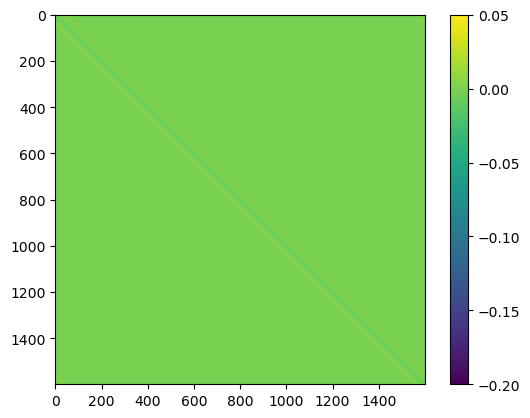

In [152]:
plt.imshow(G)
plt.colorbar()

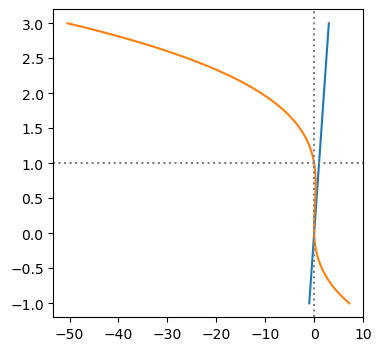

In [153]:
u_array = np.linspace(-1,3,100)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(u_array,u_array)
e = 1e-3
a, b = (3, 0.2)
ax.plot(a*u_array*(u_array-b)*(1-u_array), u_array)
ax.axvline(0, c='grey', ls=':')
ax.axhline(1, c='grey', ls=':')

In [ ]:
out = sp.integrate.solve_ivp(FHN, (0, T), y0, t_eval=np.linspace(0, T, plot_n), method='BDF')

In [ ]:
plt.plot(out['t'],out['y']
         [N//2,:].T)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
im = ax.imshow(out['y'][:N, 20].reshape(N_x,N_y))
plt.colorbar(im)

## Brain

In [ ]:
G=np